## Importing the libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

## Importing the dataset

In [41]:
df = pd.read_csv('../datasets/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
X = df.iloc[:, [3, 4]].values

## Using dendrogram and silhouette scores to find optimal number of clusters

In [43]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):  # silhouette score needs at least 2 clusters
    hc = AgglomerativeClustering(n_clusters = i, metric = 'euclidean', linkage = 'ward')
    labels = hc.fit_predict(X)
    score = silhouette_score(X, labels)

    silhouette_scores.append(score)

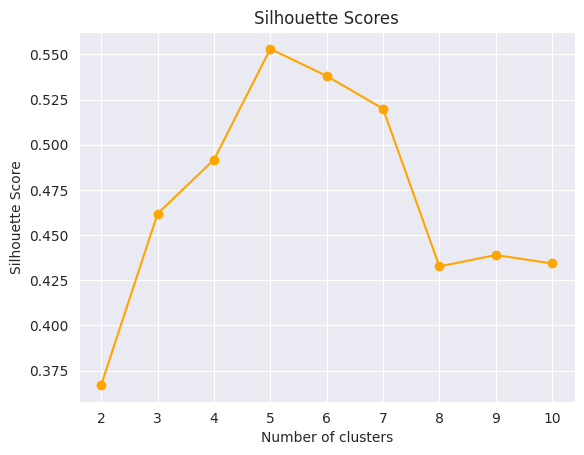

In [44]:
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

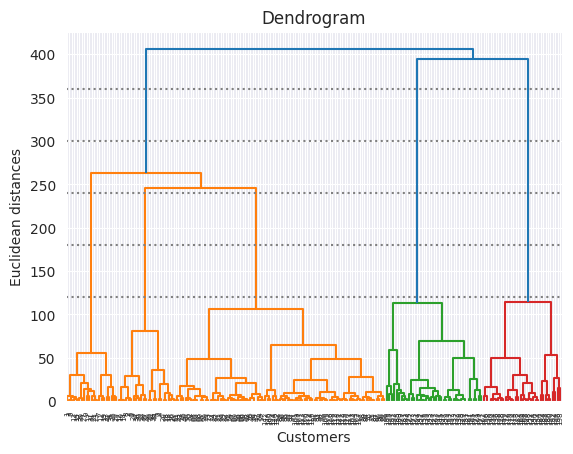

In [45]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=120, color="gray", linestyle=":")
plt.axhline(y=180, color="gray", linestyle=":")
plt.axhline(y=240, color="gray", linestyle=":")
plt.axhline(y=300, color="gray", linestyle=":")
plt.axhline(y=360, color="gray", linestyle=":")

# plt.savefig("../plots/Dendrogram.png", dpi=100, bbox_inches='tight')

plt.show()

## Training the Hierarchical Clustering model on the dataset

In [46]:
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## Visualising the clusters

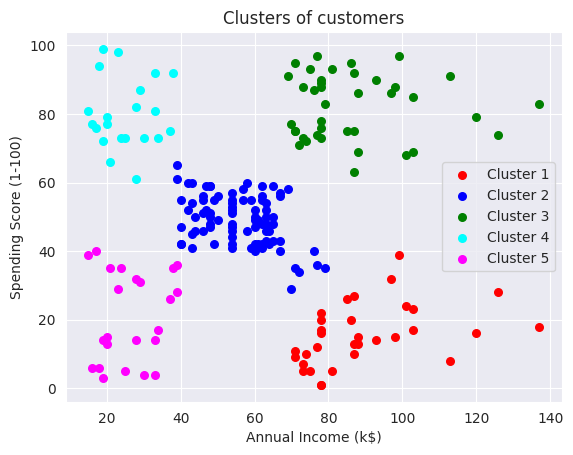

In [47]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 30, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 30, c = 'magenta', label = 'Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
# plt.savefig("../plots/Hierarchical.png", dpi=100, bbox_inches='tight')
plt.show()